In [ ]:
# DON'T

def function():
    # these return the actual strings that you put here
    return "Error: LineString or Polygon geometries required!"
    # or
    return("Error! Please insert a list of Shapely Points or coordinate tuples!")

length=function(xyz)
print(length)

# DO

def function():
    # ...
    print("Error: LineString or Polygon geometries required!")
    # no return statement or return explicitly None
    return None

# also
    # don't return in brackets
    return (polygon)
    # do
    return polygon


# tuple
PList = (point1, point2)

# list
PList = [point1, point2]


# do not make spaces before the brackets, for readability, but after commas

# all work though :-) but for style

# no
Point (x, y)
# no
Point(x,y)
# yes, ideal
Point(x, y)


# variable and function names, lower case first letters is better

# no
Point1 = createPointGeom(1.5,3.2)
# no
point1 = CreatePointGeom(1.5,3.2)

# yes
point1 = createPointGeom(1.5, 3.2)
point1 = create_point_geom(1.5, 3.2)


# reserved words

def getCentroid(object):
    return object.centroid



# it works, but it's dangerous and might be misleading

# Lesson3: Point in Polygon & Intersect

- https://kodu.ut.ee/~kmoch/geopython2020/L3/point-in-polygon.html

In [2]:
from shapely.geometry import Point, Polygon

# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

# Create a Polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)

In [3]:
# Let's check what we have
print(p1)

print(p2)

print(poly)

POINT (24.952242 60.1696017)
POINT (24.976567 60.16125)
POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


In [4]:
# Check if p1 is within the polygon using the within function
print(p1.within(poly))


# Check if p2 is within the polygon
print(p2.within(poly))


True
False


In [5]:
# Our point
print(p1)

# The centroid
print(poly.centroid)

POINT (24.952242 60.1696017)
POINT (24.95224242849236 60.16960179038188)


In [6]:
# Does polygon contain p1?
print(poly.contains(p1))


# Does polygon contain p2?
print(poly.contains(p2))

True
False


In [7]:
from shapely.geometry import LineString, MultiLineString

# Create two lines
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

In [8]:
line_a.intersects(line_b)

True

In [9]:
line_a.touches(line_b)

True

In [10]:
line_a.touches(line_a)

False

In [11]:
line_a.contains(line_a)

True

In [12]:
line_a.intersects(line_a)

True

In [13]:
import geopandas as gpd

# protected species under class 3 monitoring sightings
species_fp = "category_3_species_porijogi.gpkg"

species_data = gpd.read_file(species_fp, layer='category_3_species_porijogi', driver='GPKG')

In [14]:
# porijogi_sub_catchments
polys_fp = "porijogi_sub_catchments.geojson"

polys = gpd.read_file(polys_fp, driver='GeoJSON')

polys.head(5)

,OBJECTID,NAME_1,AREA_1,Shape_Leng,Shape_Area,ID,geometry
0,8,Idaoja,3823.427995,35446.162219,3.823428e+07,1,"MULTIPOLYGON (((660834.858 6455555.914, 660851..."
1,9,Keskjooks,5087.809731,42814.174755,5.087810e+07,2,"MULTIPOLYGON (((666339.502 6455972.600, 666384..."
2,10,Peeda,5634.162684,47792.268153,5.634163e+07,3,"MULTIPOLYGON (((659914.002 6456514.131, 659817..."
3,11,Sipe,890.280919,16449.028656,8.902809e+06,4,"MULTIPOLYGON (((665928.914 6460634.243, 665985..."
4,12,Tatra,3306.643841,31108.960376,3.306644e+07,5,"MULTIPOLYGON (((658678.470 6457825.152, 658579..."


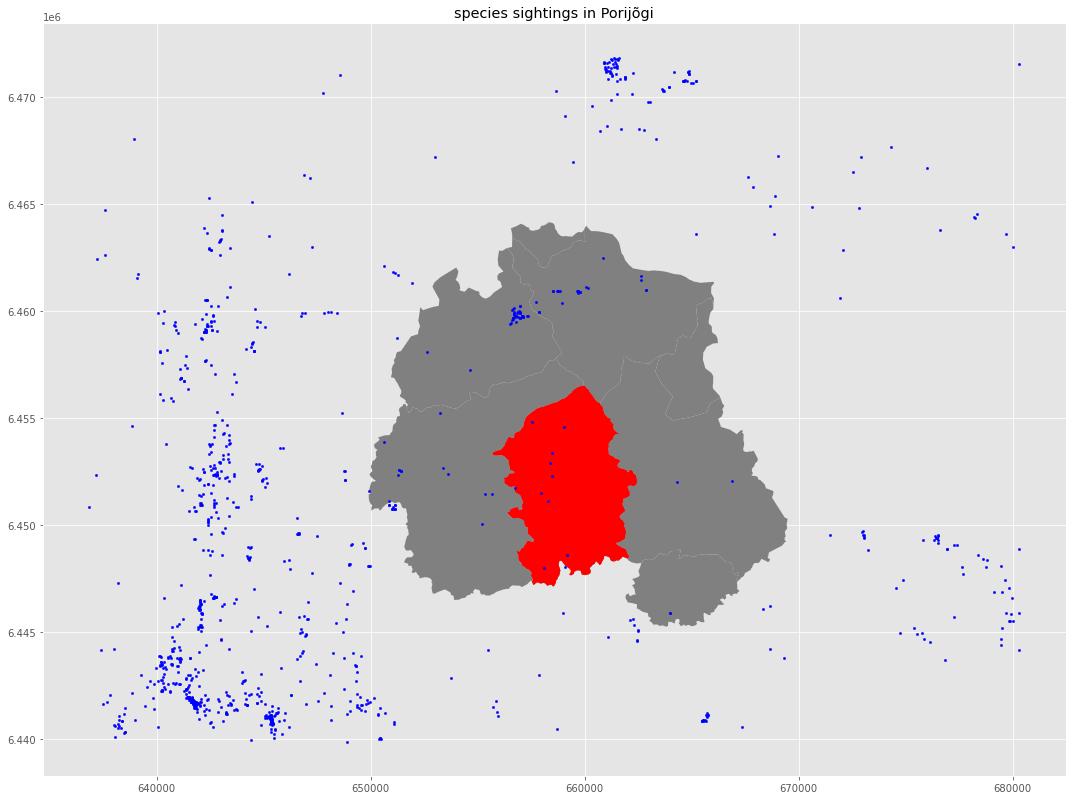

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)

subcatch = polys.loc[polys['NAME_1']=='Idaoja']

subcatch.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots()

polys.plot(ax=ax, facecolor='gray')

subcatch.plot(ax=ax, facecolor='red')

species_data.plot(ax=ax, color='blue', markersize=5)

plt.title("species sightings in Porijõgi")

plt.tight_layout()

In [16]:
import shapely.speedups

shapely.speedups.enable()

In [17]:
pip_mask = species_data.within(subcatch.loc[0, 'geometry'])
display(pip_mask)

0       False
1       False
2       False
3       False
4       False
        ...  
1032    False
1033    False
1034    False
1035    False
1036    False
Length: 1037, dtype: bool

In [18]:
pip_data = species_data.loc[pip_mask]
pip_data

,OBJECTID,LIIK,NIMI,EXT_SYST_I,KKR_KOOD,PRIV_TYYP,STAATUS,IMPORT,LAADIMISKP,geometry
249,152958,taimed III,ohakasoomukas,-1902179792,KLO9331094,Avalik,kontrollitud,0,2018-10-29,POINT (657531.007 6454827.405)
674,145079,loomad III,valge-toonekurg,-1632330969,KLO9105497,Avalik,kontrollitud,0,2018-10-29,POINT (657952.380 6451525.770)
691,145191,loomad III,valge-toonekurg,1355787943,KLO9105625,Avalik,kontrollitud,0,2018-10-29,POINT (659189.190 6448592.205)
694,145194,loomad III,valge-toonekurg,1430734590,KLO9105624,Avalik,kontrollitud,0,2018-10-29,POINT (658311.690 6451115.475)
695,145196,loomad III,valge-toonekurg,1653031368,KLO9105598,Avalik,kontrollitud,0,2018-10-29,POINT (658117.710 6447988.785)
979,147275,loomad III,valge-toonekurg,-934352158,KLO9108256,Avalik,kontrollitud,0,2018-10-29,POINT (659040.735 6454585.439)
980,147279,loomad III,valge-toonekurg,-345614917,KLO9108257,Avalik,kontrollitud,0,2018-10-29,POINT (658493.413 6453377.590)
982,147282,loomad III,valge-toonekurg,13169300,KLO9108254,Avalik,kontrollitud,0,2018-10-29,POINT (658495.234 6452311.248)
985,147297,loomad III,valge-toonekurg,1849924613,KLO9108255,Avalik,kontrollitud,0,2018-10-29,POINT (658387.491 6452891.505)


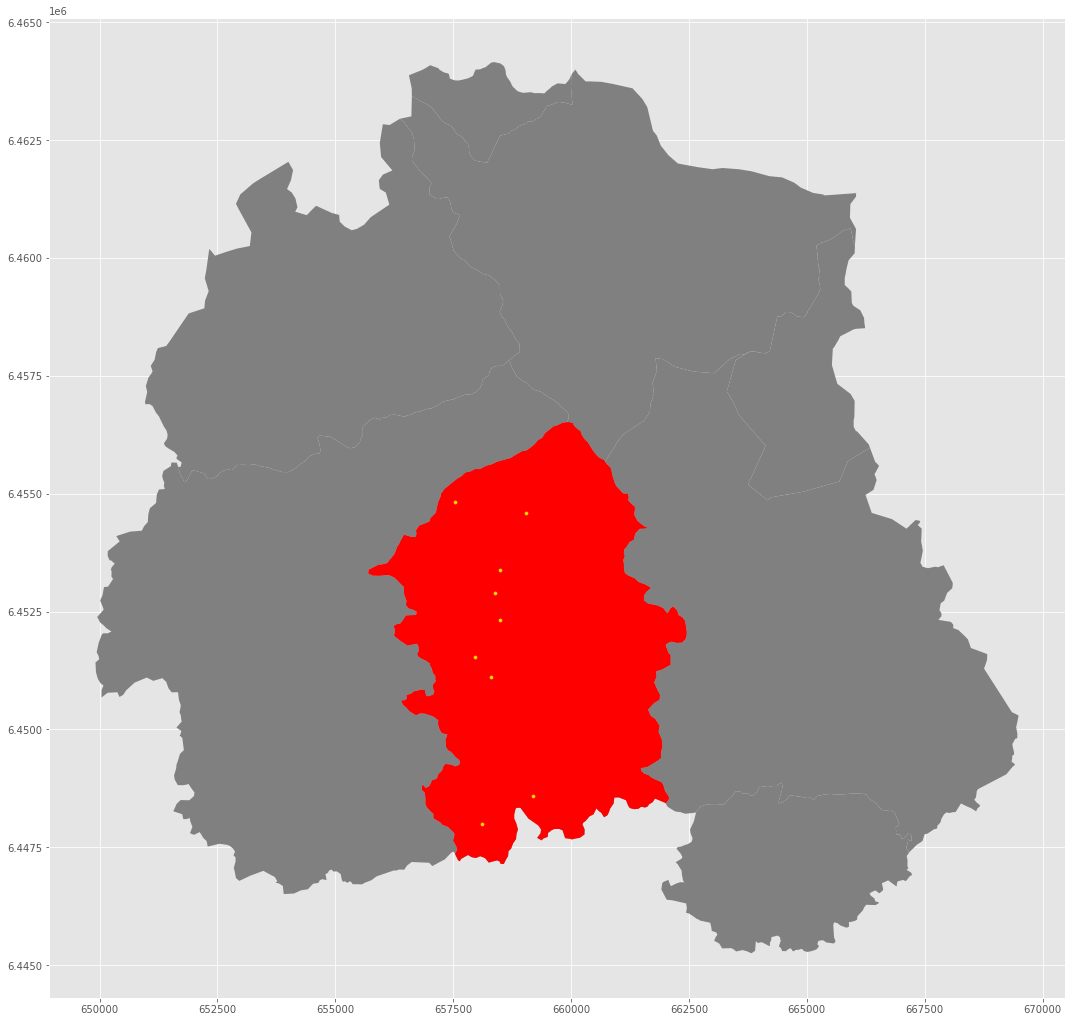

In [19]:
subcatch = polys.loc[polys['NAME_1']=='Idaoja']

subcatch.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots()

polys.plot(ax=ax, facecolor='gray')

subcatch.plot(ax=ax, facecolor='red')

pip_data.plot(ax=ax, color='gold', markersize=10)

plt.tight_layout()

# Lesson3: Spatial join

- https://kodu.ut.ee/~kmoch/geopython2020/L3/spatial-join.html

In [20]:
In [1]: import geopandas as gpd

# Filepath
fp = "porijogi_corine_landuse.shp"

# Read the data
lulc = gpd.read_file(fp)

lulc.head(5)

,code_12,id,remark,area_ha,shape_area,clc_int,Landuse,geometry
0,112,EU-2024407,None,67.055321,670553.20630,112,URML,"POLYGON ((658854.791 6458244.203, 658826.936 6..."
1,112,EU-2024418,None,36.452500,364525.00295,112,URML,"POLYGON ((663553.865 6459840.806, 663570.622 6..."
2,112,EU-2024426,None,33.525145,335251.45070,112,URML,"POLYGON ((659006.349 6463680.667, 659031.241 6..."
3,112,EU-2024431,None,30.111925,301119.25420,112,URML,"POLYGON ((658401.027 6466951.556, 658518.679 6..."
4,112,EU-2024434,None,70.979465,709794.64765,112,URML,"POLYGON ((658348.310 6467489.990, 658040.310 6..."


In [21]:
lulc.columns

Index(['code_12', 'id', 'remark', 'area_ha', 'shape_area', 'clc_int',
       'Landuse', 'geometry'],
      dtype='object')

In [22]:
import pandas as pd

codes = pd.read_csv('corine_landuse_codes.csv', sep=';')
codes

,CLC_CODE,LABEL1,LABEL2,LABEL3,RGB
0,111,Artificial surfaces,Urban fabric,Continuous urban fabric,230-000-077
1,112,Artificial surfaces,Urban fabric,Discontinuous urban fabric,255-000-000
2,121,Artificial surfaces,"Industrial, commercial and transport units",Industrial or commercial units,204-077-242
3,122,Artificial surfaces,"Industrial, commercial and transport units",Road and rail networks and associated land,204-000-000
4,123,Artificial surfaces,"Industrial, commercial and transport units",Port areas,230-204-204
5,124,Artificial surfaces,"Industrial, commercial and transport units",Airports,230-204-230
6,131,Artificial surfaces,"Mine, dump and construction sites",Mineral extraction sites,166-000-204
7,132,Artificial surfaces,"Mine, dump and construction sites",Dump sites,166-077-000
8,133,Artificial surfaces,"Mine, dump and construction sites",Construction sites,255-077-255
9,141,Artificial surfaces,"Artificial, non-agricultural vegetated areas",Green urban areas,255-166-255


In [23]:
lulc = lulc.merge(codes, left_on='clc_int', right_on='CLC_CODE')
lulc.sample(10)

,code_12,id,remark,area_ha,shape_area,clc_int,Landuse,geometry,CLC_CODE,LABEL1,LABEL2,LABEL3,RGB
104,243,EU-2034155,None,76.626613,7.662661e+05,243,AGRL,"POLYGON ((653296.055 6450635.992, 653291.552 6...",243,Agricultural areas,Heterogeneous agricultural areas,"Land principally occupied by agriculture, with...",230-204-077
127,243,EU-2034328,None,54.560810,5.456081e+05,243,AGRL,"POLYGON ((661595.757 6457878.711, 661567.866 6...",243,Agricultural areas,Heterogeneous agricultural areas,"Land principally occupied by agriculture, with...",230-204-077
106,243,EU-2034170,None,81.891829,8.189183e+05,243,AGRL,"POLYGON ((667470.635 6447687.671, 667463.684 6...",243,Agricultural areas,Heterogeneous agricultural areas,"Land principally occupied by agriculture, with...",230-204-077
14,211,EU-2026590,None,145.943466,1.459435e+06,211,AGRL,"POLYGON ((658601.496 6449150.496, 658623.559 6...",211,Agricultural areas,Arable land,Non-irrigated arable land,255-255-168
70,231,EU-2030036,None,46.906026,4.690603e+05,231,PAST,"POLYGON ((659713.937 6468938.493, 659681.809 6...",231,Agricultural areas,Pastures,Pastures,230-230-077
79,242,EU-2032454,None,61.198528,6.119853e+05,242,AGRL,"POLYGON ((657821.123 6456616.892, 657745.715 6...",242,Agricultural areas,Heterogeneous agricultural areas,Complex cultivation patterns,255-230-077
228,324,EU-2052184,None,36.311202,3.631120e+05,324,RNGB,"POLYGON ((661464.244 6460808.992, 661531.200 6...",324,Forest and semi natural areas,Scrub and/or herbaceous vegetation associations,Transitional woodland-shrub,166-242-000
126,243,EU-2034309,None,35.063507,3.506351e+05,243,AGRL,"POLYGON ((656641.623 6457916.993, 656646.563 6...",243,Agricultural areas,Heterogeneous agricultural areas,"Land principally occupied by agriculture, with...",230-204-077
201,313,EU-2046360,None,99.528515,9.952851e+05,313,FRST,"POLYGON ((658182.936 6459962.995, 658169.248 6...",313,Forest and semi natural areas,Forests,Mixed forest,077-255-000
242,511,EU-2057279,None,680.904882,6.809048e+06,511,WATR,"POLYGON ((662550.899 6469623.451, 662525.245 6...",511,Water bodies,Inland waters,Water courses,000-204-242


In [24]:
selected_cols = ['Landuse', 'LABEL2','geometry']
lulc = lulc[selected_cols]
lulc.sample(10)

,Landuse,LABEL2,geometry
133,AGRL,Heterogeneous agricultural areas,"POLYGON ((657366.116 6461623.492, 657386.554 6..."
208,RNGB,Scrub and/or herbaceous vegetation associations,"MULTIPOLYGON (((662107.089 6446379.300, 662142..."
33,AGRL,Arable land,"POLYGON ((652508.844 6458810.370, 652502.556 6..."
90,AGRL,Heterogeneous agricultural areas,"POLYGON ((665182.620 6460185.991, 665143.059 6..."
188,FRST,Forests,"POLYGON ((658183.498 6456106.487, 658272.934 6..."
162,FRSE,Forests,"POLYGON ((659479.625 6461436.491, 659397.056 6..."
233,RNGB,Scrub and/or herbaceous vegetation associations,"POLYGON ((656620.927 6463896.279, 656568.413 6..."
5,URML,Urban fabric,"POLYGON ((660085.129 6468300.595, 660298.497 6..."
209,RNGB,Scrub and/or herbaceous vegetation associations,"POLYGON ((667298.435 6448002.994, 667248.803 6..."
131,AGRL,Heterogeneous agricultural areas,"POLYGON ((659379.808 6459999.493, 659243.178 6..."


In [25]:
# protected species under class 3 monitoring sightings
species_fp = "category_3_species_porijogi.gpkg"

species = gpd.read_file(species_fp, layer='category_3_species_porijogi', driver='GPKG')

display(species.sample(5))
display(species.crs)
display(lulc.crs)

,OBJECTID,LIIK,NIMI,EXT_SYST_I,KKR_KOOD,PRIV_TYYP,STAATUS,IMPORT,LAADIMISKP,geometry
122,144638,taimed III,suur käopõll,1168260435,KLO9313493,Avalik,kontrollitud,0,2018-10-29,POINT (645353.720 6440821.133)
177,154123,taimed III,aas-karukell,1347850995,KLO9312790,Avalik,kontrollitud,0,2018-10-29,POINT (651428.213 6452525.079)
682,148170,taimed III,soo-neiuvaip,-612958862,KLO9312907,Peidetud,arhiveeritud,0,2018-10-29,POINT (645199.304 6441022.882)
229,154406,taimed III,pruunikas pesajuur,-27891495,KLO9303413,Avalik,kontrollitud,0,2018-10-29,POINT (643403.752 6453987.804)
858,147769,taimed III,kahelehine käokeel,-815713109,KLO9319395,Avalik,kontrollitud,0,2018-10-29,POINT (644741.190 6452543.119)


<Projected CRS: EPSG:3301>
Name: Estonian Coordinate System of 1997
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Estonia
- bounds: (20.37, 57.52, 28.2, 60.0)
Coordinate Operation:
- name: Estonian National Grid
- method: Lambert Conic Conformal (2SP)
Datum: Estonia 1997
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Projected CRS: EPSG:3301>
Name: Estonian Coordinate System of 1997
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Estonia
- bounds: (20.37, 57.52, 28.2, 60.0)
Coordinate Operation:
- name: Estonian National Grid
- method: Lambert Conic Conformal (2SP)
Datum: Estonia 1997
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [26]:
join = gpd.sjoin(species, lulc, how="inner", op="within")

join.head()

,OBJECTID,LIIK,NIMI,EXT_SYST_I,KKR_KOOD,PRIV_TYYP,STAATUS,IMPORT,LAADIMISKP,geometry,index_right,Landuse,LABEL2
126,144115,taimed III,läikiv kurdsirbik,-1324418359,KLO9400024,Avalik,kontrollitud,0,2018-10-29,POINT (652641.854 6458099.088),224,RNGB,Scrub and/or herbaceous vegetation associations
132,144202,taimed III,siberi võhumõõk,1344032932,KLO9312850,Avalik,kontrollitud,0,2018-10-29,POINT (660367.911 6469599.134),143,FRSD,Forests
157,151696,taimed III,balti sõrmkäpp,-376320786,KLO9317690,Avalik,kontrollitud,0,2018-10-29,POINT (656609.812 6459582.666),201,FRST,Forests
201,154300,taimed III,harilik käoraamat,-403691661,KLO9303449,Avalik,kontrollitud,0,2018-10-29,POINT (657356.897 6459780.112),201,FRST,Forests
257,154692,taimed III,suur käopõll,1784194494,KLO9303464,Avalik,kontrollitud,0,2018-10-29,POINT (657291.854 6459783.092),201,FRST,Forests


In [27]:
# Output path
outfp = "landuse_per_species.shp"

# Save to disk
join.to_file(outfp)

In [28]:
join['NIMI'].value_counts()

valge-toonekurg           20
balti sõrmkäpp            20
kahkjaspunane sõrmkäpp    17
suur käopõll              16
aas-karukell               6
soo-neiuvaip               5
vööthuul-sõrmkäpp          5
sulgjas õhik               2
harilik käoraamat          2
siberi võhumõõk            2
roomav öövilge             1
Veski                      1
suur-kuldtiib              1
ohakasoomukas              1
vingerjas                  1
kodukakk                   1
hink                       1
kuradi-sõrmkäpp            1
läikiv kurdsirbik          1
hall käpp                  1
suur-rabakiil              1
valgelaup-rabakiil         1
Name: NIMI, dtype: int64

In [29]:
join['LABEL2'].value_counts()

Forests                                            52
Heterogeneous agricultural areas                   22
Scrub and/or herbaceous vegetation associations    22
Pastures                                            4
Inland waters                                       2
Urban fabric                                        2
Arable land                                         2
Inland wetlands                                     1
Name: LABEL2, dtype: int64

In [30]:
data_list = [] 

for species_id, species_group in join.groupby('NIMI'):
    lulc_count = species_group['LABEL2'].value_counts()
    top = lulc_count.head(1)
    # display(type(top))
    # print(top)
    data_list.append(
        {
            'species_id':species_id,
            'all_sights': len(species_group),
            'top_lulc': top.index[0],
            'sights_in_top': top[0]
        }
    )
    print("species_id: {}, number of sightings: {}, top lulc: {}, number: {}".format(species_id, len(species_group), top.index[0], top[0] ))

species_id: Veski, number of sightings: 1, top lulc: Forests, number: 1
species_id: aas-karukell, number of sightings: 6, top lulc: Forests, number: 4
species_id: balti sõrmkäpp, number of sightings: 20, top lulc: Forests, number: 12
species_id: hall käpp, number of sightings: 1, top lulc: Forests, number: 1
species_id: harilik käoraamat, number of sightings: 2, top lulc: Scrub and/or herbaceous vegetation associations, number: 1
species_id: hink, number of sightings: 1, top lulc: Scrub and/or herbaceous vegetation associations, number: 1
species_id: kahkjaspunane sõrmkäpp, number of sightings: 17, top lulc: Forests, number: 12
species_id: kodukakk, number of sightings: 1, top lulc: Heterogeneous agricultural areas, number: 1
species_id: kuradi-sõrmkäpp, number of sightings: 1, top lulc: Scrub and/or herbaceous vegetation associations, number: 1
species_id: läikiv kurdsirbik, number of sightings: 1, top lulc: Scrub and/or herbaceous vegetation associations, number: 1
species_id: ohakas

In [31]:
# Creates DataFrame. 
top_sights = pd.DataFrame(data_list) 
  
# Print the data 
top_sights.sort_values(by=['all_sights','sights_in_top'], ascending=False)

,species_id,all_sights,top_lulc,sights_in_top
18,valge-toonekurg,20,Heterogeneous agricultural areas,15
2,balti sõrmkäpp,20,Forests,12
6,kahkjaspunane sõrmkäpp,17,Forests,12
15,suur käopõll,16,Forests,14
1,aas-karukell,6,Forests,4
13,soo-neiuvaip,5,Scrub and/or herbaceous vegetation associations,3
21,vööthuul-sõrmkäpp,5,Forests,3
4,harilik käoraamat,2,Scrub and/or herbaceous vegetation associations,1
12,siberi võhumõõk,2,Heterogeneous agricultural areas,1
14,sulgjas õhik,2,Scrub and/or herbaceous vegetation associations,1
